In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sl
import seaborn as sns; sns.set()
import matplotlib as mpl
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
%matplotlib inline

# Tarea 3: Encuentre la regresión

Ud recibe unos datos $x$ y $y$ cómo se muestran a continuación. Ud debe responder cuatro preguntas a partir de estos datos. Suponga que ud tiene un modelo tal que $y=f(x)$ más aún desconoce $f$.

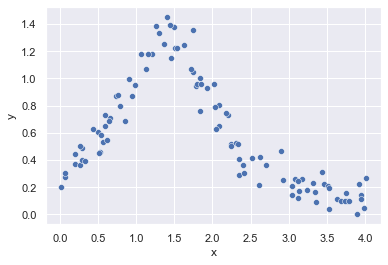

,x,y
0,0.065859,0.277413
1,0.020931,0.202239
2,0.070312,0.307369
3,0.206166,0.367530
4,0.286572,0.491144
...,...,...
95,3.922613,0.225565
96,3.898473,0.000000
97,3.952111,0.141005
98,3.939211,0.115500


In [2]:
df = pd.read_pickle('ex1.gz')
sns.scatterplot(x='x',y='y',data=df)
plt.show()
df


## (A) Pendiente e intercepto
Determine la pendiente de los datos en el intervalo $[0,1.5]$ y el valor del intercepto con el eje $y$. Es decir, $f(0)=?$. ¿Cuál es el valor de $r^2$?

In [3]:
k = df[(df.x >= 0) & (df.x <= 1.5)]
k
x1= k['x'].values.reshape(-1,1)
x2= k['y'].values.reshape(-1,1)

modelo = LinearRegression()
modelo.fit(x1,x2)
intercepto = modelo.intercept_
m = modelo.coef_
r2 = modelo.score(x1,x2)

print("Intercepto: ", intercepto)
print("Pendiente: ", m)
print("R^2: ", r2)



Intercepto:  [0.18270691]
Pendiente:  [[0.81638696]]
R^2:  0.9316416262309236










## (B) Regresión polinomial
Suponga que quiere realizar la siguiente regresión polinomial,
$$y=\beta_1+\beta_2x+\beta_2x^2+\beta_2x^3+\beta_2x^4+\beta_2x^5.$$
Plantee la función de costo que le permita calcular los coeficientes y calcule $\beta_1$, $\beta_2$, $\beta_3$, $\beta_4$, y $\beta_5$. ¿Cuál es el $r^2$?

Calcule $f(0)$ y compare con los resultados anteriores




In [4]:
def L(x,A,b):
    m,n = A.shape
    X = np.matrix(x).T
    DeltaB=(A*X-b)
    
    return (DeltaB.T*DeltaB)[0,0]/m 

In [5]:
Y = df.loc[:, ['y']]
Y

X = df.loc[:, ['x']].rename(columns={'x': 'x1'})
X.insert(0, 'x0', 1)
X['x2'] = X['x1']*X['x1']
X['x3'] = X['x1']**3
X['x4'] = X['x1']**4
X['x5'] = X['x1']**5
Xi = X.to_numpy()
Yi = Y.to_numpy()

In [6]:
op = sp.optimize.minimize(fun=L,x0=np.zeros(Xi.shape[1]), args = (Xi,Yi), tol=1e-10)
print("El valor para los coeficientes es:",op['x'])
print("El valor para f(0):",op['x'][0])

El valor para los coeficientes es: [ 0.35735903 -0.8426113   3.78480048 -3.00339568  0.858447   -0.08305839]
El valor para f(0): 0.35735903460277


In [7]:
y = df["y"]
b = np.linspace(0,4,100)
def f(a,b,c,d,e,f,x):
    return a*x**5 + b*x**4 + c*x**3 + d*x**2 + e*x + f

p = f(op['x'][5],op['x'][4],op['x'][3],op['x'][2],op['x'][1],op['x'][0],b)
r2 = 1-np.sum((p-y)**2)/np.sum((y-y.mean())**2)
r2

0.9111078266547238

In [8]:
print("Es posible apreciar un resultado similar al metodo de la polinomial exacta, evidenciando que ambos metodos poseen una buena precision con solo algunas variaciones en cifras decimales")

Es posible apreciar un resultado similar al metodo de la polinomial exacta, evidenciando que ambos metodos poseen una buena precision con solo algunas variaciones en cifras decimales


## (C) Regresión polinomial exacta
Resulta, que cuando se quiere hacer alguna regresión polinomial esta se puede hacer de forma exacta. ¿Cómo? Suponga que ud va a considerar que su problema en lugar de tener $1$ variable ($x$) tiene $n+1$, siendo $n$ el orden del polinomio a ajustar. Es decir, sus nuevas variables van a ser $\{x_0,\,x_1,\,x_2,\,x_3,\dots,\,x_n\}$ definiendo $x_j=x^j$. Así pues, siguiendo el mismo procedimiento para la regresión lineal multidimensional que realizamos para el ejercicio de datos inmobiliarios, puede encontrar los valores de los coeficientes $\beta_1$, $\beta_2$, $\beta_3$, $\beta_4$, y $\beta_5$. Encuentre estos valores y compare con los resultados en la sección **(B)**.

Calcule $f(0)$ y compare con los resultados anteriores.

> Si ud se pregunta si esto es posible la respuesta es sí. Inclusive, esto se puede extender a cualquier a cualquier conjunto de funciones, tal que $x_j=f_j(x)$, que represente un conjunto "linealmente independiente" (¡Me estoy adelantando a *Fourier*!). Para quienes quieran explorar algunas curiosidades matemáticas, cuando $n+1$ es igual al número de puntos o valores de $x$ (y todos diferentes) la matriz es siempre invertible y resulta ser la inversa de una matriz de Vandermonde.

In [9]:
rt = np.linalg.inv(Xi.T @ Xi) @ Xi.T @ Yi
b0, b1, b2, b3, b4, b5 = rt
coefs = str(b0) +','+ str(b1) + ',' + str(b2) + ',' + str(b3) + ',' + str(b4) + ',' + str(b5)

print(f"los coeficientes son = {coefs}")
print(f"El valor de f(0) es :", rt[0])

los coeficientes son = [0.35644668],[-0.83588268],[3.77276401],[-2.99526012],[0.85614705],[-0.08282854]
El valor de f(0) es : [0.35644668]


In [10]:
print("Se confirma como el valor para f(0) resulta muy preciso al ser comparado con valor de la regresión polinomica y a su vez resulta ser exacto si analizamos lo esperado por la grafica ")

Se confirma como el valor para f(0) resulta muy preciso al ser comparado con valor de la regresión polinomica y a su vez resulta ser exacto si analizamos lo esperado por la grafica 


## (D) Regresión a un modelo teórico

Suponga que su modelo teórico es el siguiente:
$$y=\frac{a}{\left[(x-b)^2+c\right]^\gamma}.$$
Halle $a$, $b$, $c$ y $\gamma$.

Calcule $f(0)$ y compare con los resultados anteriores

In [11]:
def f(i,x):
    return (i[0])/((x-i[1])**2 + i[2])**i[3]

def L(i2,x,y): 
    dy = f(i2,x) - y
    return np.dot(dy,dy)/len(y)


In [12]:
x = df["x"]
op = sp.optimize.minimize(fun=L, x0=np.array([0,0,1,0]), args = (x,y), method='L-BFGS-B', tol=1e-8)

print("Los valores de a,b,c y omega son",op['x'])
print("El valor de f(0) es:", f(op.x,0))

Los valores de a,b,c y omega son [0.68762883 1.39239679 0.49596189 0.93701312]
El valor de f(0) es: 0.2987063706912142


In [13]:
print("Con respecto a los dos anteriores metodos utilizados, este nos arrojo un valor de 0.2987 evidenciando menor presicion y exactitud, por lo que podriamos decir que este metodo es el menos optimo")

Con respecto a los dos anteriores metodos utilizados, este nos arrojo un valor de 0.2987 evidenciando menor presicion y exactitud, por lo que podriamos decir que este metodo es el menos optimo


# Tarea 4

Con base a los métodos vistos en clase resuelva las siguientes dos preguntas

## (A) Integrales

* $\int_{0}^{1}x^{-1/2}\,\text{d}x$
* $\int_{0}^{\infty}e^{-x}\ln{x}\,\text{d}x$
* $\int_{0}^{\infty}\frac{\sin{x}}{x}\,\text{d}x$

In [14]:
x0 = 0.0000001
x1 = 1
xi = 0.0000001
xf =100

n = 1000001

def f1(x):
    return x**(-1/2)

def f2(x):
    return np.exp(-x)*np.log(x)

def f3(x):
    return np.sin(x)/x


In [15]:
def integral(ini, fin, n, f1):
    x, delta_x = np.linspace( ini, fin, num=n-1 , retstep=True  )
    
    return (delta_x/3)*(   f1(x[0]) + 2*np.sum(f1(x[2:len(x)-1:2])) + 4*np.sum(f1(x[1::2])) + f1(x[-1]) )

In [16]:
f1_int = integral(x0, x1, n, f1)
print(f"El valor de la primera integral corresponde a: {f1_int}")

El valor de la primera integral corresponde a: 1.9996587005541837


In [17]:
f2_int = integral(xi, xf, n, f2)
print(f"El valor de la segunda integral corresponde a: {f2_int}")

El valor de la segunda integral corresponde a: -0.5773605551027813


In [18]:
f3_int = integral(xi, xf, n, f3)
print(f"El valor de la tercera integral corresponde a: {f3_int}")

El valor de la tercera integral corresponde a: 1.5622248605373656


## (B) Fourier

Calcule la transformada rápida de Fourier para la función de la **Tarea 3 (D)** en el intervalo $[0,4]$ ($k$ máximo $2\pi n/L$ para $n=25$). Ajuste la transformada de Fourier para los datos de la **Tarea 3** usando el método de regresión exacto de la **Tarea 3 (C)** y compare con el anterior resultado. Para ambos ejercicios haga una interpolación y grafique para comparar.

In [19]:
n = 25
global x, y

def a(j):
    
    r = 2*np.pi*j/4
    y2 = y*np.cos(r*x)
   
    return sp.integrate.simpson(y2, x)

def b(j):
    
    r = 2*np.pi*j/4
    y2 = y*np.sin(r*x)
    return sp.integrate.simpson(y2, x)
    
    
a0 = np. array([a(j) for j in range(n)])
b0 = np. array([b(j) for j in range(n)])


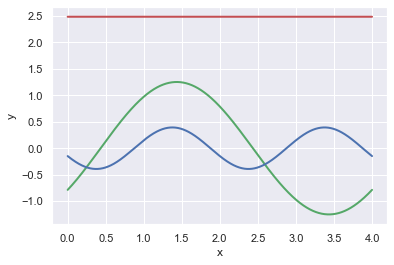

In [20]:

x_lim = np.linspace(0, 4, 10000) 
r = np. array([2*np.pi*j/4 for j in range(n)])
y_lim = np.sum([(a0[j]*np.cos(r[j]*x_lim)  +  b0[j]*np.sin(r[j]*x_lim)) for j in range(n)], axis=0)


plt.plot(x_lim, (a0[0]*np.cos(r[0]*x_lim)  +  b0[0]*np.sin(r[0]*x_lim)), c="r", linewidth = 2.0)
plt.plot(x_lim, (a0[1]*np.cos(r[1]*x_lim)  +  b0[1]*np.sin(r[1]*x_lim)), c="g", linewidth = 2.0 )
plt.plot(x_lim, (a0[2]*np.cos(r[2]*x_lim)  +  b0[2]*np.sin(r[2]*x_lim)), c="b", linewidth = 2.0 )
plt.xlabel('x')
plt.ylabel('y')
plt.show()


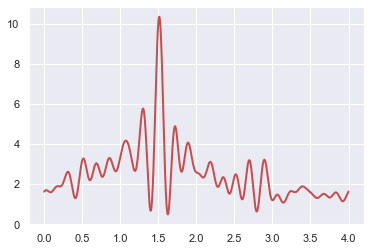

In [21]:
plt.plot(x_lim, y_lim, c = "r", linewidth = 2.0)
plt.show()
